In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import utils
from constants import *

In [2]:
date_column = 'Date'

###  System Price of electricity, pence per kilowatt-hour
Source: ONS calculations from BMRS data © Elexon Limited copyright and database right 2024

The System Price is used to **settle the difference between contracted generation or consumption of electricity and actual generation or consumption**. This is calculated for each half hour trading period in the Balancing Market, which is the mechanism used to balance supply and demand on Great Britain’s electricity market.

Companies are contracted **to generate or consume**a certain amount of electricity within each half-hour (known as the Settlement Period), however this may differ from the actual amount generated or consumed. Where companies have generated more or less than the amount of energy their customers consume, this difference is balanced by the UK’s National Grid Transmission System, which buys or sells enough electricity to reconcile the difference. The System Price is designed to reflect the cost incurred by National Grid in doing this.

In [3]:
system_prices = pd.read_excel("data/electricitypricesdataset270624.xlsx", sheet_name="Data")
system_prices[date_column] = pd.to_datetime(system_prices[date_column])
system_prices.set_index(date_column)
system_prices.head()

,Date,Daily average,7-day average
0,2020-01-01,3.951,3.721
1,2020-01-02,1.771,3.486
2,2020-01-03,2.135,3.113
3,2020-01-04,2.700,2.989
4,2020-01-05,2.758,2.853


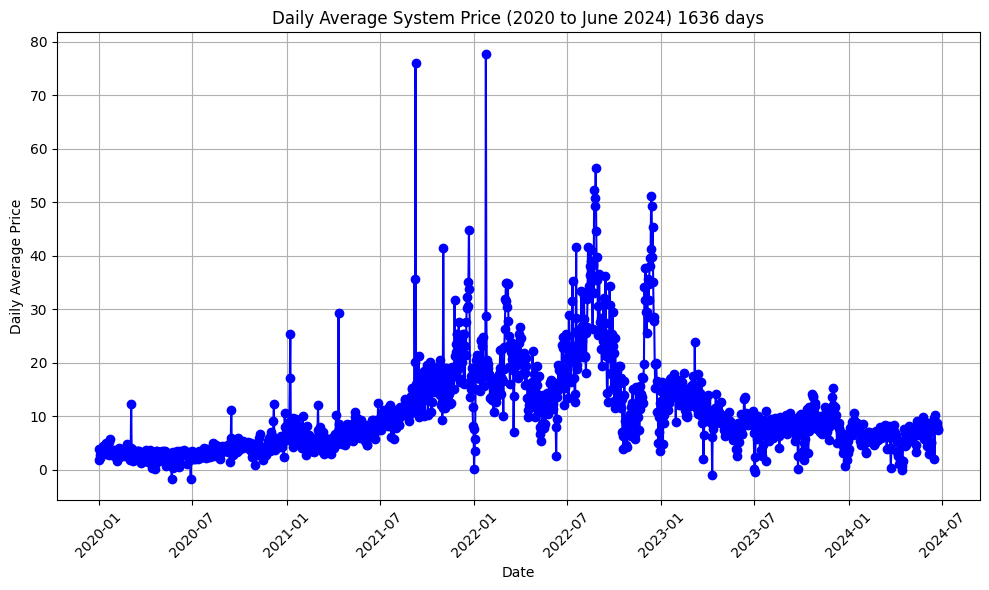

In [4]:
# Graph the daily average system price from 2020 to June 2024

# Plot the daily average system price
plt.figure(figsize=(10, 6))
plt.plot(system_prices[date_column], system_prices['Daily average'], marker='o', linestyle='-', color='b')

# Customize the plot
plt.title(f'Daily Average System Price (2020 to June 2024) {len(system_prices)} days')
plt.xlabel(date_column)
plt.ylabel('Daily Average Price')
plt.grid(True)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


## 15 - Day Prediction

In [5]:
start = '2023-02-01'
end = '2023-03-01'
column = 'Daily average'
prediction_length = 64

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


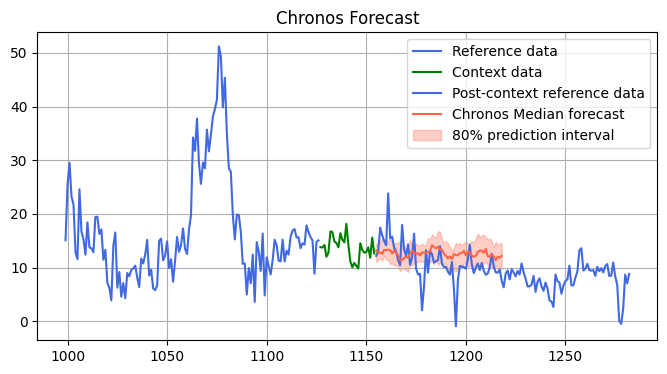

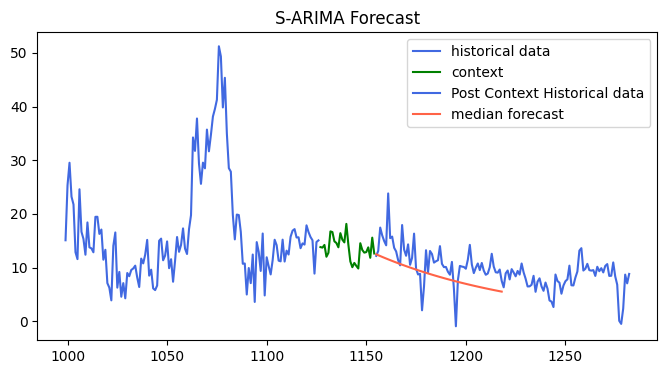

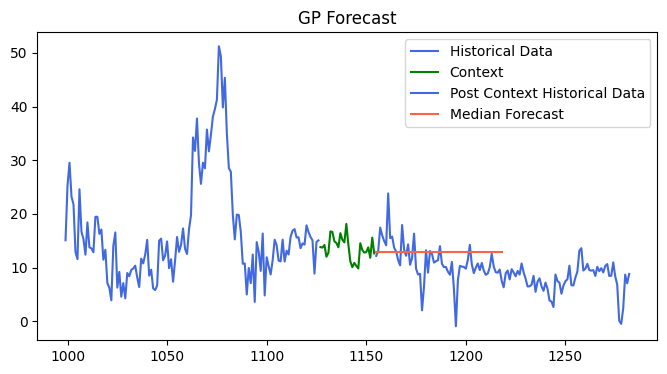

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


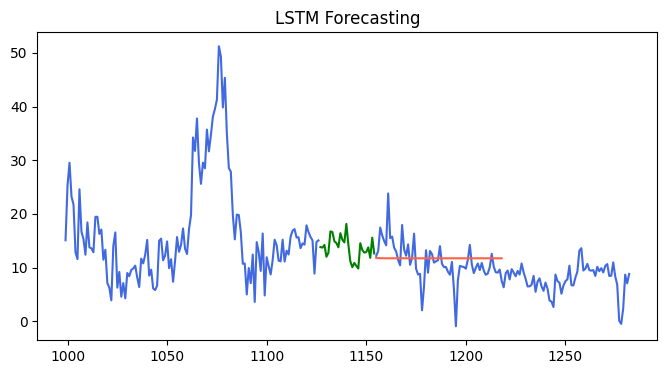


Results comparison for Daily average:

MSE
- chronos_mini MSE: 14.113264623926574
- sarima MSE: 15.675216465533246
- gp MSE: 15.400127190233365
- lstm MSE: 12.741521452136965
NMSE
- chronos_mini NMSE: 1.1368654893980576
- sarima NMSE: 1.262685361138713
- gp NMSE: 1.2405261009019453
- lstm NMSE: 1.0263674923803303



In [6]:
_ = utils.compare_prediction_methods(system_prices,column,date_column,start,end,prediction_length)

In [7]:
context_window_length = utils.find_first_occurrence_index(system_prices,end,"Date") - utils.find_first_occurrence_index(system_prices,start,"Date")
print(f"context_window_length: {context_window_length}")
#utils.whole_window_comparison_of_data(system_prices,column,context_window_length,prediction_length)

context_window_length: 28


## One Month Prediction

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


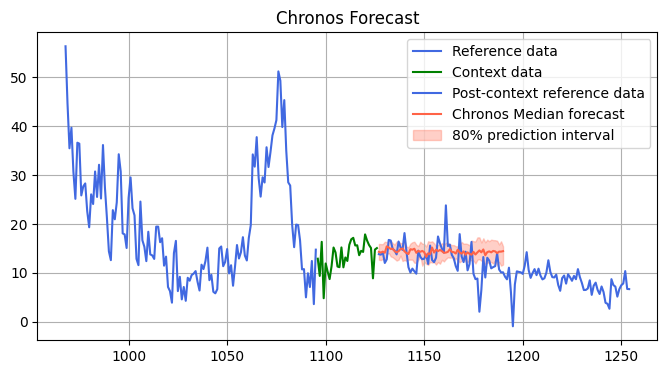

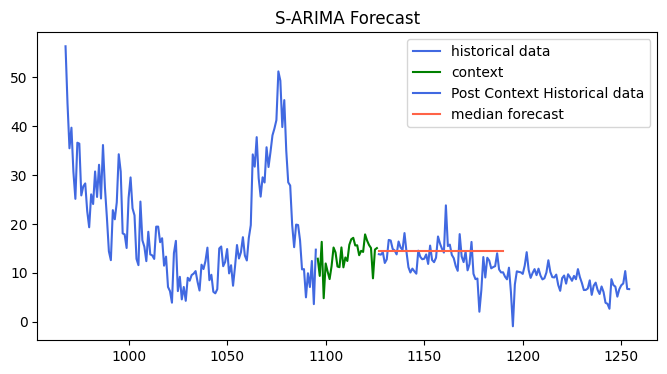

/opt/homebrew/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


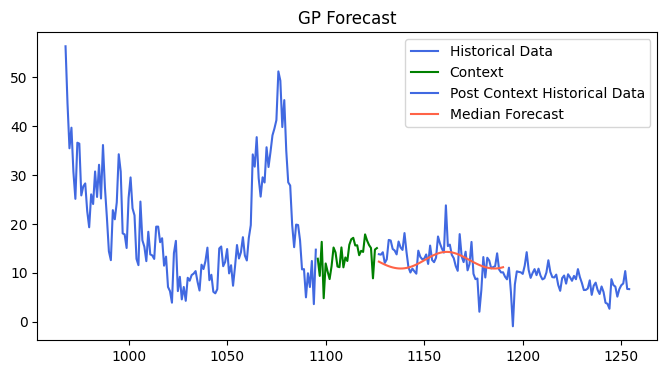

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


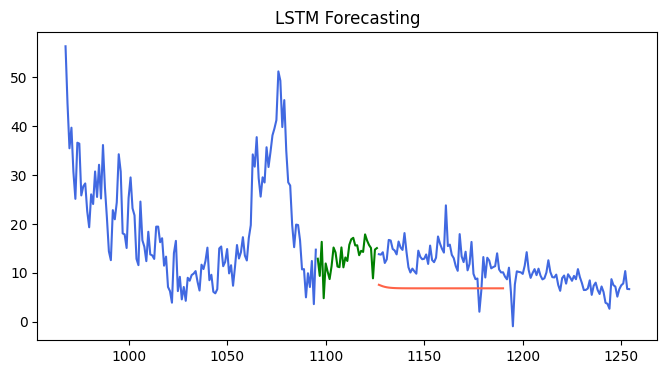


Results comparison for Daily average:

MSE
- chronos_mini MSE: 11.336969034556015
- sarima MSE: 11.454415883599312
- gp MSE: 9.34073219354982
- lstm MSE: 46.850350860482685
NMSE
- chronos_mini NMSE: 1.1932886654482902
- sarima NMSE: 1.2056506991919478
- gp NMSE: 0.9831719412460632
- lstm NMSE: 4.931299757782125



In [8]:
start = '2023-01-01'
end = '2023-02-01'
column = 'Daily average'
prediction_length = 64

_ = utils.compare_prediction_methods(system_prices,column,date_column,start,end,prediction_length)

## Two Month Prediction

/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


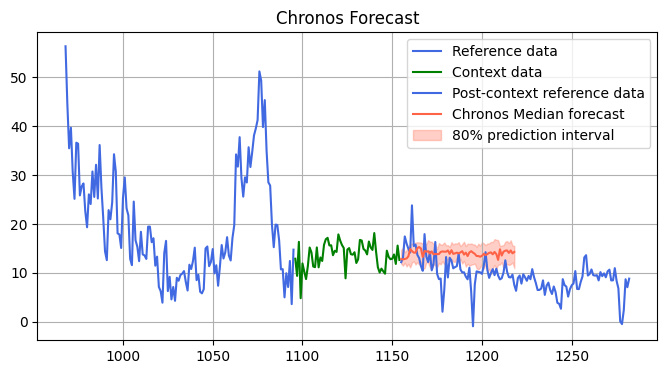

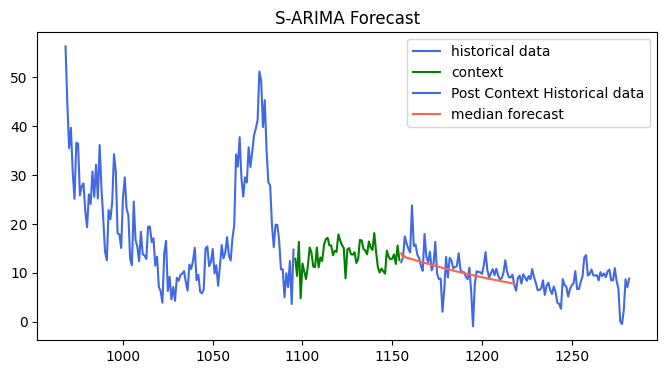

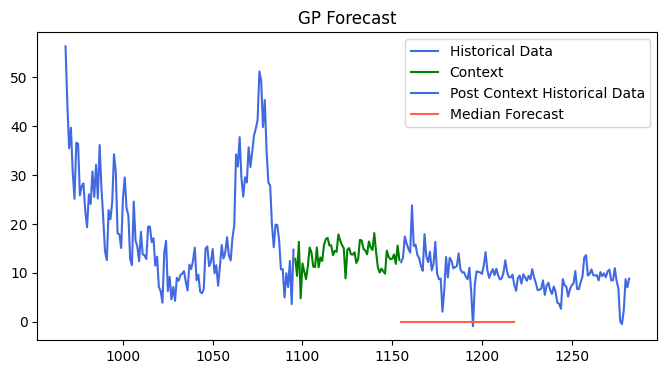

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


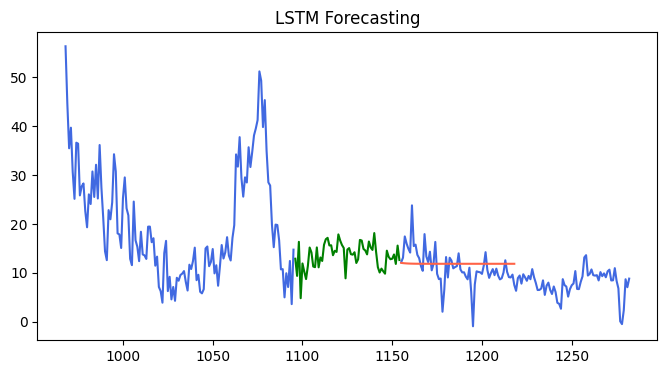


Results comparison for Daily average:

MSE
- chronos_mini MSE: 21.199943547203155
- sarima MSE: 9.57496734067718
- gp MSE: 136.82242078125
- lstm MSE: 12.850458102569439
NMSE
- chronos_mini NMSE: 1.707718578105767
- sarima NMSE: 0.7712921299069957
- gp NMSE: 11.021453399123343
- lstm NMSE: 1.0351426639446286



In [9]:
start = '2023-01-01'
end = '2023-03-01'
column = 'Daily average'
prediction_length = 64
_ = utils.compare_prediction_methods(system_prices,column,date_column,start,end,prediction_length)

## Three Months Prediction

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


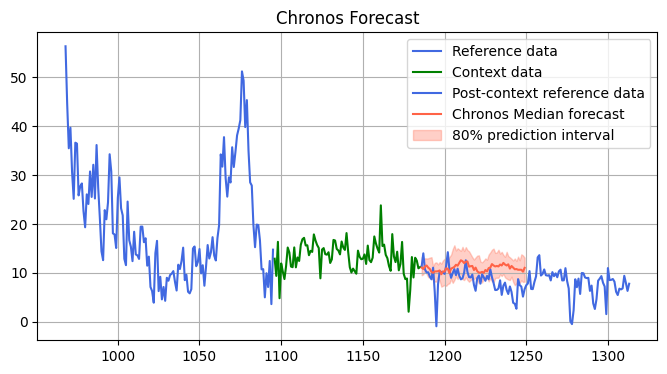

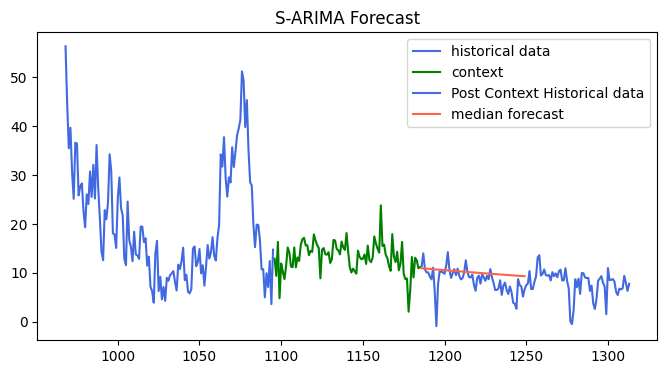

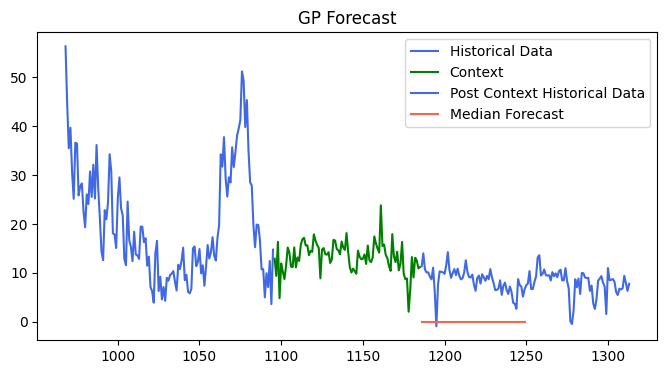

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


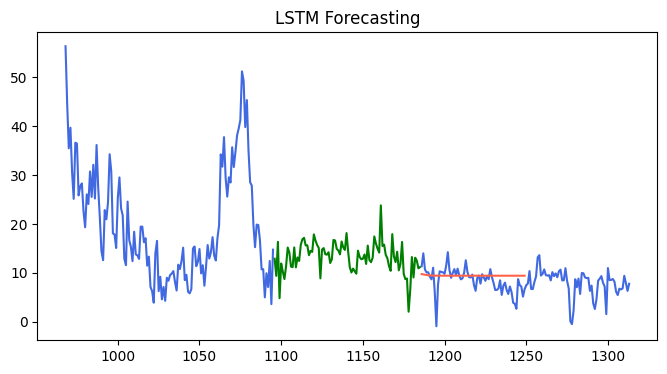


Results comparison for Daily average:

MSE
- chronos_mini MSE: 12.700582772822735
- sarima MSE: 7.715478806227365
- gp MSE: 78.91038870312497
- lstm MSE: 6.986330524865884
NMSE
- chronos_mini NMSE: 2.0319369236485727
- sarima NMSE: 1.2343816461358381
- gp NMSE: 12.62469095579184
- lstm NMSE: 1.1177268955456803



In [10]:
start = '2023-01-01'
end = '2023-04-01'
column = 'Daily average'
prediction_length = 64

_ = utils.compare_prediction_methods(system_prices,column,date_column,start,end,prediction_length)

## Six Months Context

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


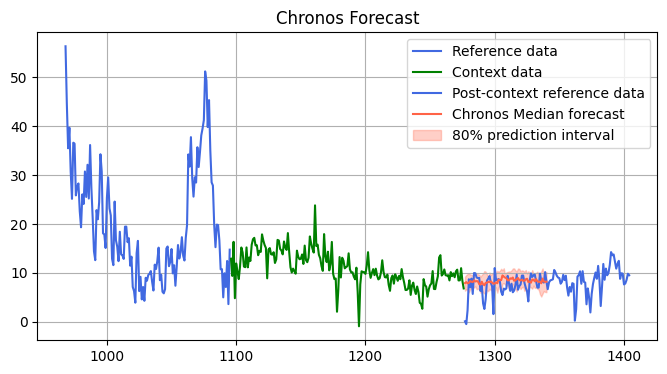

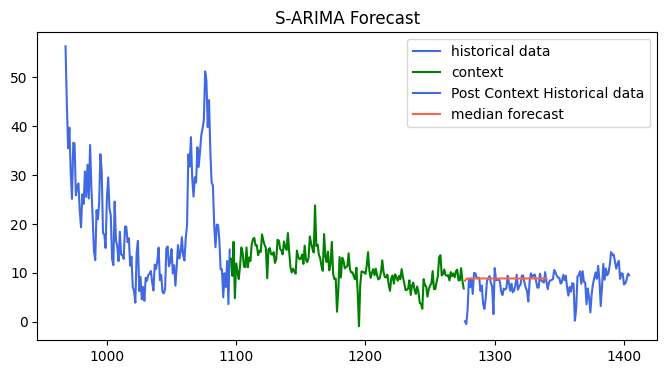

/opt/homebrew/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


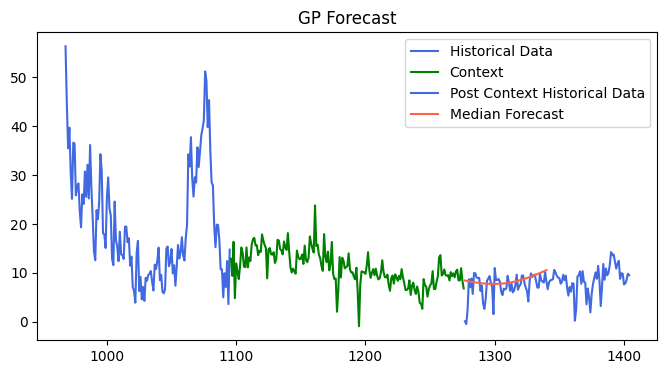

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


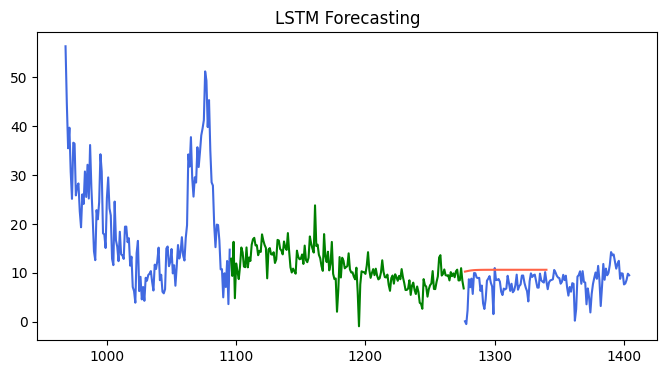


Results comparison for Daily average:

MSE
- chronos_mini MSE: 6.260002836301853
- sarima MSE: 7.5025467212092565
- gp MSE: 6.569699934696164
- lstm MSE: 15.718861301643033
NMSE
- chronos_mini NMSE: 1.1384629231402543
- sarima NMSE: 1.3644356871042738
- gp NMSE: 1.1947853678972173
- lstm NMSE: 2.858679341505949



In [11]:
start = '2023-01-01'
end = '2023-07-01'
column = 'Daily average'
prediction_length = 64

_ = utils.compare_prediction_methods(system_prices,column,date_column,start,end,prediction_length)

## Having seen one anomaly, can you predict next?

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


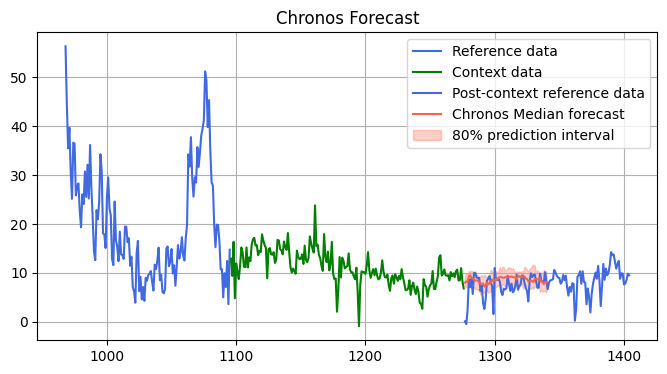

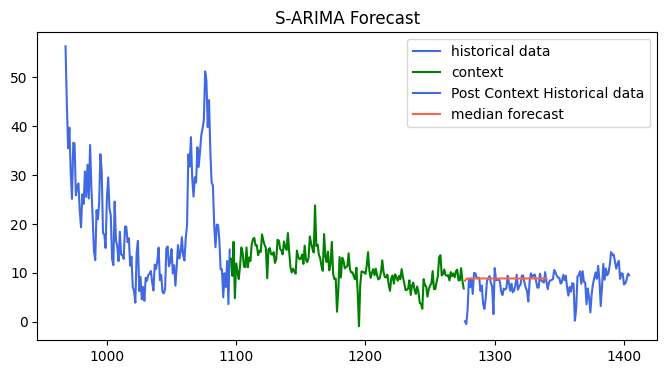

/opt/homebrew/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


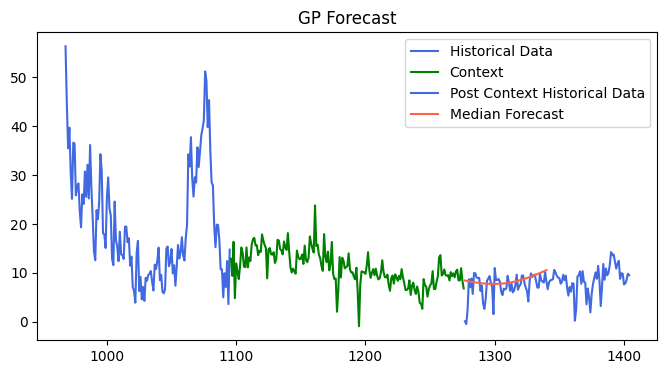

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


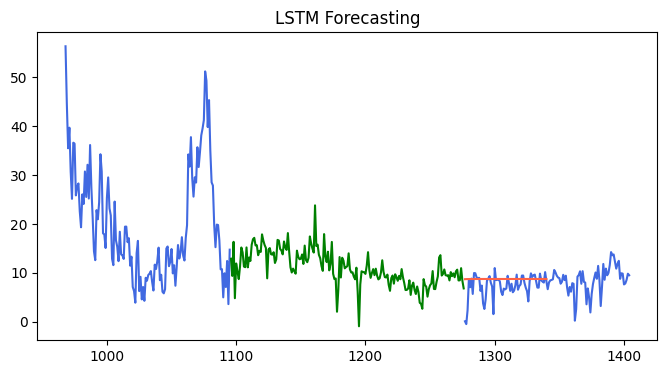


Results comparison for Daily average:

MSE
- chronos_mini MSE: 6.708772046589572
- sarima MSE: 7.5025467212092565
- gp MSE: 6.569699934696164
- lstm MSE: 7.351571516325974
NMSE
- chronos_mini NMSE: 1.220077439989471
- sarima NMSE: 1.3644356871042738
- gp NMSE: 1.1947853678972173
- lstm NMSE: 1.3369788827596514



In [12]:
_ = utils.compare_prediction_methods(system_prices,column,date_column,start,end,prediction_length)

## One Year Context Prediction

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


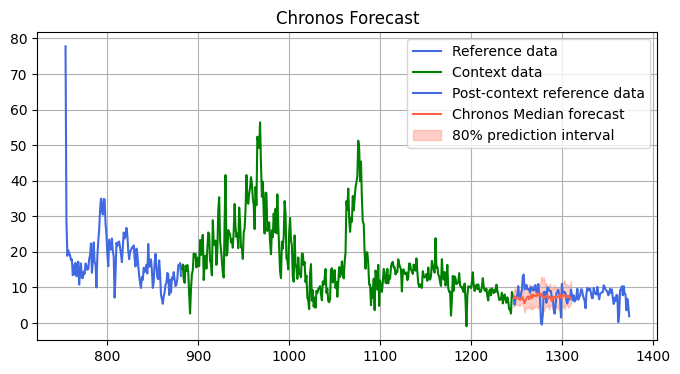

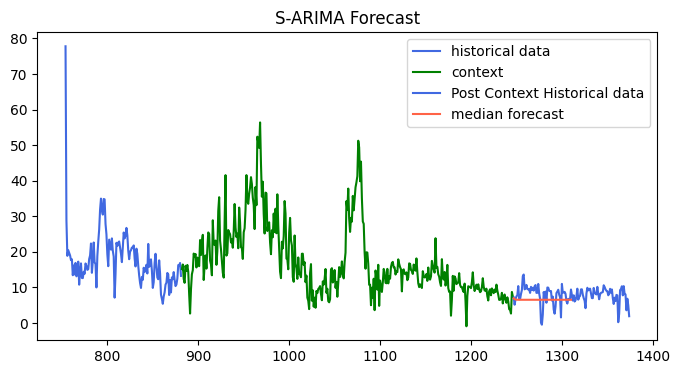

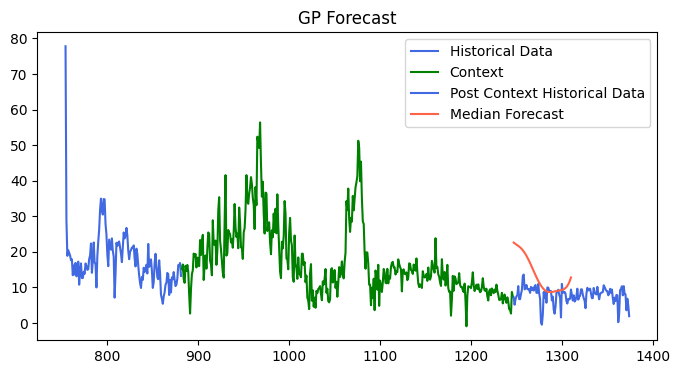

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


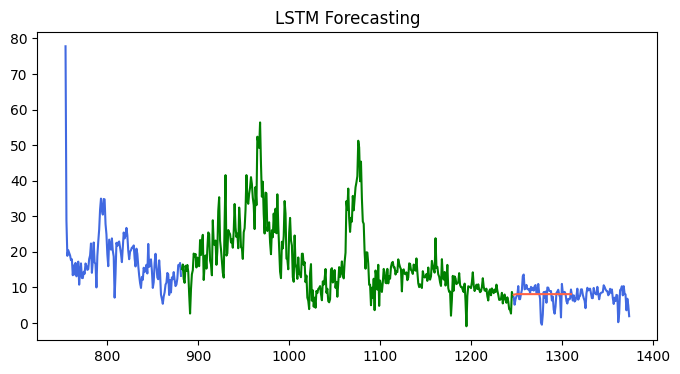


Results comparison for Daily average:

MSE
- chronos_mini MSE: 8.126020874038293
- sarima MSE: 8.921829256153039
- gp MSE: 54.406756449357374
- lstm MSE: 7.076125242512107
NMSE
- chronos_mini NMSE: 1.1537047898534174
- sarima NMSE: 1.2666909557128476
- gp NMSE: 7.724486127835674
- lstm NMSE: 1.0046441810125262



In [13]:
start = '2022-06-01'
end = '2023-06-01'
column = 'Daily average'
prediction_length = 64

_ = utils.compare_prediction_methods(system_prices,column,date_column,start,end,prediction_length)

## Two Year Context Comparison

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


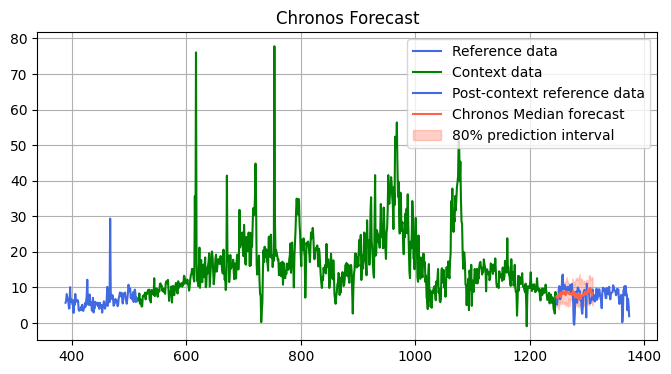

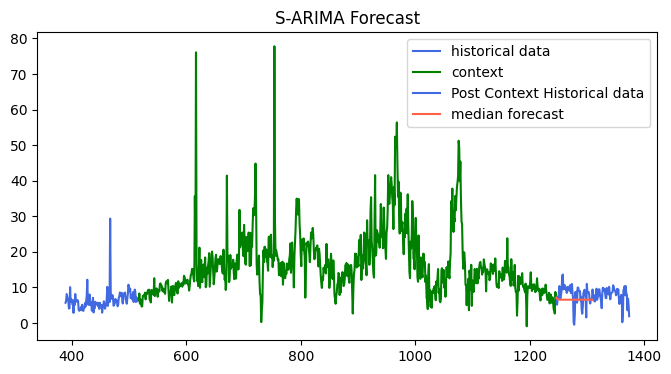

/opt/homebrew/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


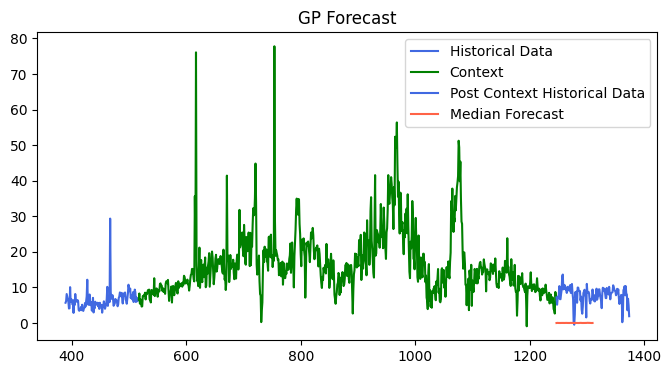

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


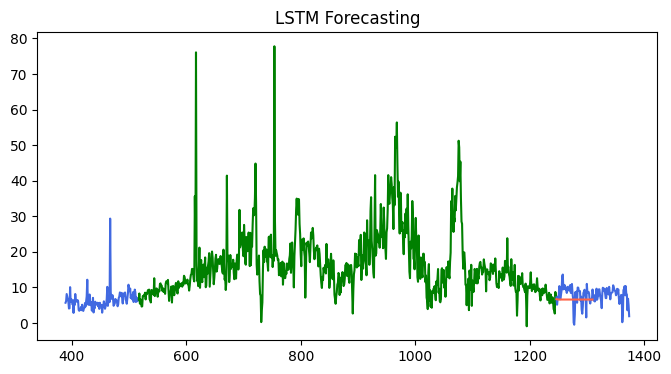


Results comparison for Daily average:

MSE
- chronos_mini MSE: 7.18771047020475
- sarima MSE: 8.869645099425831
- gp MSE: 69.21009814019388
- lstm MSE: 8.741340333957446
NMSE
- chronos_mini NMSE: 1.0204866719021553
- sarima NMSE: 1.2592820267297842
- gp NMSE: 9.826214203518978
- lstm NMSE: 1.2410657527653863



In [14]:
start = '2021-06-01'
end = '2023-06-01'
column = 'Daily average'
prediction_length = 64

_ = utils.compare_prediction_methods(system_prices,column,date_column,start,end,prediction_length)

## Three Year Context

In [15]:
start = '2020-06-01'
end = '2023-06-01'
column = 'Daily average'
prediction_length = 64

# utils.compare_prediction_methods(system_prices,column,start,end,prediction_length)